# Assignment 8

## Authors

- User ID:  gunilanht

- Name: Andreas Nilsson

- Group 17

- Course: DIT734 - Python for Data Scientist

- Assignment: 8

- Date: 28 Oct 



In [175]:
import pandas as pd
import numpy as np
import os


        ## Libs for Plotting
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")

        ## Algorithms
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [57]:
import os
os.chdir('C:/Users/Andreas Nilsson/Desktop/Göteborg/Python for DS/A 8')  # C:/Users/Andreas Nilsson/Desktop/test/welcome.txt
Poll_Info = pd.read_csv(r'Poll_Info.csv', delimiter='\t')
Poll_Report = pd.read_csv(r'Poll_Report.csv', delimiter=';')

## Analyse how many questions are correctly answered by each student.

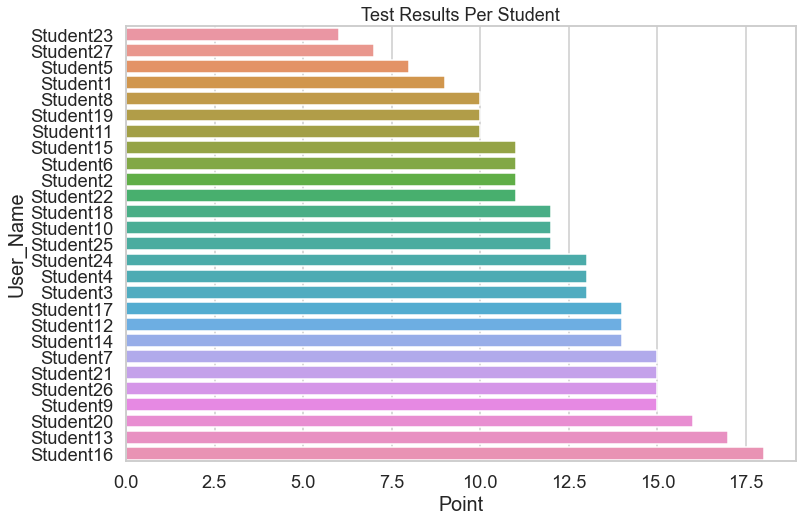

In [174]:
Poll_Info.columns = ['Question ID','Correct Answer','Time Launched']

# join report with info
Raw = pd.DataFrame(Poll_Report.merge(Poll_Info, on='Question ID', how='left'))

    ## Create column to compare student answer with acutal answer
Raw['Point'] =  np.where(Raw['Student Answer'] == Raw['Correct Answer'], 1, 0)

    ## Aggregate points per student in asending order
questionPerStudent = pd.DataFrame(Raw.groupby(['User Name'])['Point'].agg('sum'))   #df.groupby(['Fruit','Name']).sum()
questionPerStudent = Raw.groupby(['User Name'])['Point'].sum().reset_index()
questionPerStudent.rename(columns = {'User Name':'User_Name'}, inplace = True)
questionPerStudent = questionPerStudent.sort_values(by=['Point'])

    ## Plot results
plt.figure(figsize=(12,8))
plt.title("Test Results Per Student", size=18)
ax = sns.barplot(x="Point", y="User_Name", data=questionPerStudent)


## Analyse how many students answered correctly for each question

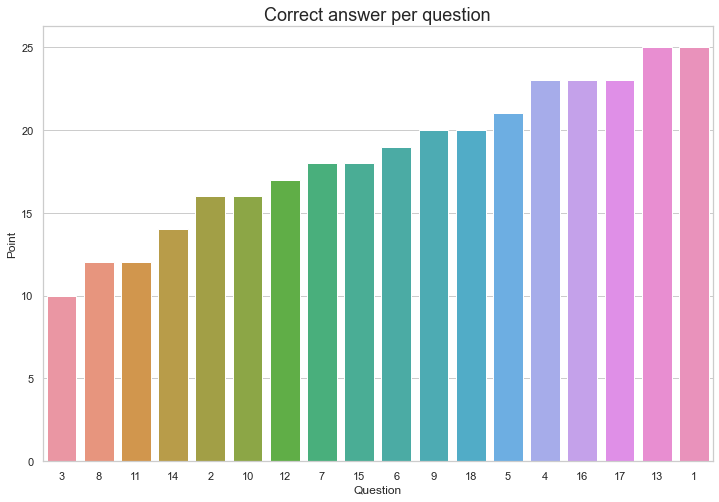

In [60]:
    ## Aggregate correct answerd points per question in asending order
CorrectPerQuestion = pd.DataFrame(Raw.groupby(['Question ID'])['Point'].agg('sum'))   #df.groupby(['Fruit','Name']).sum()
CorrectPerQuestion = Raw.groupby(['Question ID'])['Point'].sum().reset_index()
CorrectPerQuestion.rename(columns = {'Question ID':'Question'}, inplace = True)
CorrectPerQuestion = CorrectPerQuestion.sort_values(by=['Point'])

    ## Plot results
plt.figure(figsize=(12,8))
plt.title("Correct answer per question", size=18)
ax = sns.barplot(x="Question", y="Point",  data=CorrectPerQuestion ,order=CorrectPerQuestion.sort_values('Point').Question)

## For each student, which question(s) took the longest time for that student? 

In [92]:
    ##Calculate max time per question for each student
Raw["Time Launched"] = pd.to_datetime(Raw["Time Launched"])
Raw['Submitted Date/Time'] = pd.to_datetime(Raw["Submitted Date/Time"])
Raw['TimeToAnswer'] = ((Raw['Submitted Date/Time'] - Raw['Time Launched'])).astype('timedelta64[s]') 
maxPerStudent = pd.DataFrame(Raw.groupby(['User Name'])['TimeToAnswer'].agg('max'))

maxT = pd.DataFrame(maxPerStudent.merge(Raw, on=['User Name','TimeToAnswer'], how='left'))

df1 = maxT.iloc[:, 0:3]
co_mat = pd.crosstab(df1['User Name'], df1['Question ID'])

table = pd.pivot_table(maxT, values='TimeToAnswer', index=['User Name'],
                    columns=['Question ID'], aggfunc=np.sum, fill_value='')

print('\nMaxtix of max time (secounds) answer related to its question for each student\n')
print(table)


Maxtix of max time (secounds) answer related to its question for each student

Question ID    9      10     11     12    13     15    16     18
User Name                                                       
Student1                                                   281.0
Student10                 136.0                                 
Student11                                                  336.0
Student12                                     151.0             
Student13                                     215.0             
Student14    63.0                                               
Student15                                                  379.0
Student16                               72.0                    
Student17                                                  232.0
Student18                        136.0                          
Student19          164.0                                        
Student2                                                   335.0
Student20 

### Which question(s) took the longest time to answer among all student (that is, no student took longer to give a correct answer to this question or to any other question)? 

In [88]:
CorrectAnswers = Raw[(Raw['Student Answer']) == (Raw['Correct Answer'])]
     
print('\nLongest answers given Correct Answer: \n')
print(pd.DataFrame(CorrectAnswers.groupby(['Question ID'])['TimeToAnswer'].agg('max')).tail(3))


Longest answers given Correct Answer: 

             TimeToAnswer
Question ID              
16                  130.0
17                  115.0
18                  336.0


Question 18 had the highest answer time for all questions amoung all students with an answer time on 5 minutes and 36 (correct answer).

### Which question(s) had the longest average response time?

In [90]:

AverageTimePerQuestion = pd.DataFrame(Raw.groupby(['Question ID'])['TimeToAnswer'].agg('mean'))
AverageTimePerQuestion.rename(columns = {'TimeToAnswer':'Mean'}, inplace = True)
AverageTimePerQuestion = AverageTimePerQuestion.sort_values(by=['Mean'])
AverageTimePerQuestion.tail(5)

,Mean
Question ID,
12,94.230769
11,94.888889
10,105.888889
15,106.148148
18,164.730769


Question 18 had a significant much longer answer time that the questions that did fall on 2,3'rd place

### Investigate whether students who took a longer time to answer perform well or not.

In [94]:
    ## Average time to answer per student
StudentAverageQuestionTime = pd.DataFrame(Raw.groupby(['User Name'])['TimeToAnswer'].agg('mean'))
StudentAverageQuestionTime = StudentAverageQuestionTime.sort_values(by=['TimeToAnswer'])


questionPerStudent.rename(columns = {'User_Name':'User Name'}, inplace = True)

    ## Add Point per student to StudentAverageQuestionTime data
TimeVsPerformance = pd.DataFrame(questionPerStudent.merge(StudentAverageQuestionTime, on='User Name', how='left'))

In [97]:

    # Run Linear Resression
x = TimeVsPerformance.iloc[:,2].values.reshape(-1,1)
y = TimeVsPerformance.iloc[:,1].values.reshape(-1,1)

reg_model = LinearRegression().fit(x, y)
y_pred = reg_model.predict(x)

# r-squared
score = str(round(reg_model.score(x, y), 3))

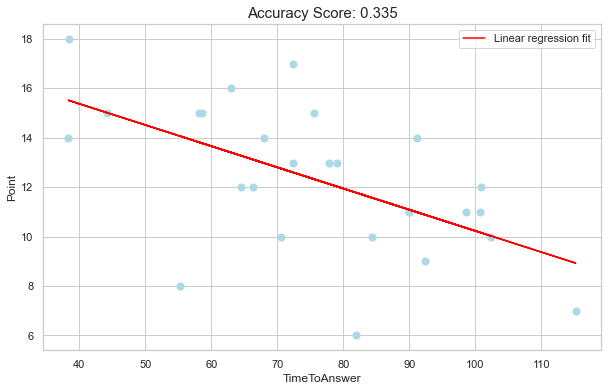

In [98]:
# Plot data
plt.figure(figsize=(10,6))
plt.scatter(x, y, s=50, color = "lightblue")
plt.plot(x ,y_pred, color = "red", label = "Linear regression fit")
plt.xlabel("TimeToAnswer")
plt.ylabel("Point")
plt.legend()
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

### Investigate whether students who took a longer time to answer perform well or not.

By making a regresson we see a weak negative relasionship (R-Squared: 0.33) indicating that most students taking longer time to answer acutally has lower total score. 

By observing the scater it seems to be a cluster of student answering bellow 50 secounds per question that performs well. There seems to be another cluster in the TimeToAnswer Range between 60 - 80 secound where most seemd to score around 12 - 17 points. 

However, even though some patterns can be identified in the data there are still clear outliers. E.g the persons that got 6 and 8 points deviate strongly to the rest of the population.

## Find all pairs of students who gave the same wrong answers for at least two questions.

In [99]:
    # filter out wrong answers
WrongAnswers = Raw[(Raw['Student Answer']) != (Raw['Correct Answer'])]

QuestionID = WrongAnswers['Question ID']
UserName = WrongAnswers['User Name']
StudentAnswer =  WrongAnswers['Student Answer']

see = pd.DataFrame(QuestionID,UserName)

df2 =pd.DataFrame()

df2['UserName'] = UserName
df2['QuestionID'] = QuestionID
df2['StudentAnswer'] = StudentAnswer


Student =   pd.DataFrame(set(Raw['User Name']))
StudentnR = [24,20,3,7,25,11,19,9,8,4,2,22,15,14,27,26,1,21,5,6,10,23,13,18,17,12,16]
Student['StudentnR'] = StudentnR
Student.columns = ['UserName','Student']
df2 = pd.DataFrame(df2.merge(Student, on='UserName', how='left'))
df2.__delitem__('UserName')

In [102]:
table = pd.pivot_table(df2, values='StudentAnswer', index=['Student'],
                    columns=['QuestionID'], aggfunc=np.sum, fill_value='')

print('\nMaxtix of given answer related to its question for each student\n')
print(table)


Maxtix of given answer related to its question for each student

QuestionID 1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18
Student                                                         
1                                B     A     A           B      
2                 D  B     D     E     A  B     A  A  C     E   
3                          D  B  C     C  E                     
4              D  D        B  A           B        A           C
5                       A        C     B  B        A  C         
6              D  D           A           B        A           C
7                 C              B  D  A  E        A  C         
8              D  A              C     A  B  C     A     A     B
9                          D  B  C                              
10                D           B  C                 A            
11          B     A        D  B                       C  A  A   
12          B  D  D     A  C  D        B  B  A        D        B
13                      

### Combination of wrong answers amoung the students (co - occurence matrix)

<AxesSubplot:xlabel='Student_y', ylabel='Student_x'>

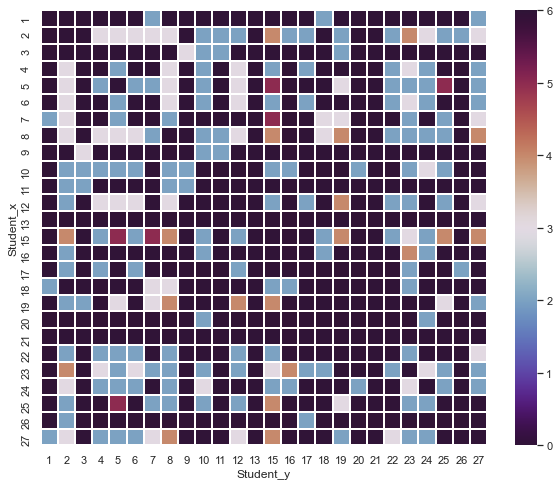

In [107]:
alltimesall = pd.DataFrame(df2.merge(df2, on=['QuestionID','StudentAnswer'], how='left' ))
alltimesall = alltimesall[(alltimesall['Student_x']) != (alltimesall['Student_y'])]

co_mat = pd.crosstab(alltimesall.Student_x, alltimesall.Student_y)
co_mat = co_mat.replace(1, 0)
plt.figure(figsize=(10,8))
sns.heatmap(co_mat, cmap='twilight_shifted', cbar=True, linewidths=1, yticklabels=1 )

We see that 5 and 25 e.g had 5 similar incorrect answers